# Data Analytics Assignment 1

Imports

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Extracting data

In [13]:
# get pandas from csv

def read_csv(filename):
    return pd.read_csv(filename)

df = read_csv('../dataset.csv')
df

C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_13220\2896704280.py:4: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filename)


,ID,Possession Status,Availability Starts From,Floor No,Commercial,Developer,Approved Authority Name,Units Available,Price,Price (English),...,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Possession By,NRI Pref,Land Area / Covered Area,Land Area Unit,Pantry Type
0,12685,Under Construction,Dec '25,5,N,NaN,KDMC,1.0,3150000.0,31.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
1,12684,Ready to Move,NaN,20,Y,TATA Housing Development Company Ltd.,TMC,10.0,6300000.0,63 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2,12683,Ready to Move,NaN,18,N,Sai Satyam Developers,KDMC,0.0,5400000.0,54 Lac,...,1,1,1,1,1,NaN,Y,NaN,NaN,NaN
3,12682,Under Construction,Dec '25,5,N,Birla Estates,KDMC,70.0,9000000.0,90 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
4,12681,Under Construction,Dec '24,8,Y,Godrej Properties,NaN,NaN,4950000.0,49.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12680,5,Dec '26,Dec '26,NaN,Y,Kalpataru Ltd.,NaN,NaN,22200000.0,2.22 Cr,...,0,0,0,0,0,Dec '26,NaN,NaN,NaN,NaN
12681,4,Under Construction,Mar '26,10,N,Kalpataru Ltd.,MCGM,20.0,31000000.0,3.10 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
12682,3,Under Construction,Mar '26,5,N,Kalpataru Ltd.,MMRDA,7.0,18500000.0,1.85 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
12683,2,Ready to Move,NaN,1,Y,NaN,MCGM,0.0,22000000.0,2.20 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN


Cleaning data

In [14]:
# remove the records with missing values



In [15]:
df.iloc[:,39]

0           635
1           579
2           850
3          1050
4           561
          ...  
12680       NaN
12681    1376.0
12682     970.0
12683       NaN
12684     685.0
Name: Covered Area.1, Length: 12685, dtype: object

### Task 1

As investors have diverse budget limits, split the overall opportunities into three different price ranges. Analyze the distribution of these price ranges across cities.

In [16]:
# divide into three price ranges

# Calculate percentiles
low_threshold = df['Price'].quantile(0.33)
medium_threshold = df['Price'].quantile(0.66)

# Define price ranges using percentiles
bins = [0, low_threshold, medium_threshold, df['Price'].max()]
labels = ['Low', 'Medium', 'High']

price_range = pd.cut(df['Price'], bins=bins, labels=labels, include_lowest=True)
# price_range

grouped_data=df.groupby(['City',price_range]).size().unstack()
grouped_data

Price,Low,Medium,High
City,,,
Agartala,1,0,0
Bhiwandi,2,0,0
Gurgaon,1,0,0
Hyderabad,8,0,0
Kalyan,7,2,0
Mumbai,2041,2599,3855
Nagpur,5,2,0
Palghar,2,0,0
Thane,2101,1556,419


Stacked Bar Graph

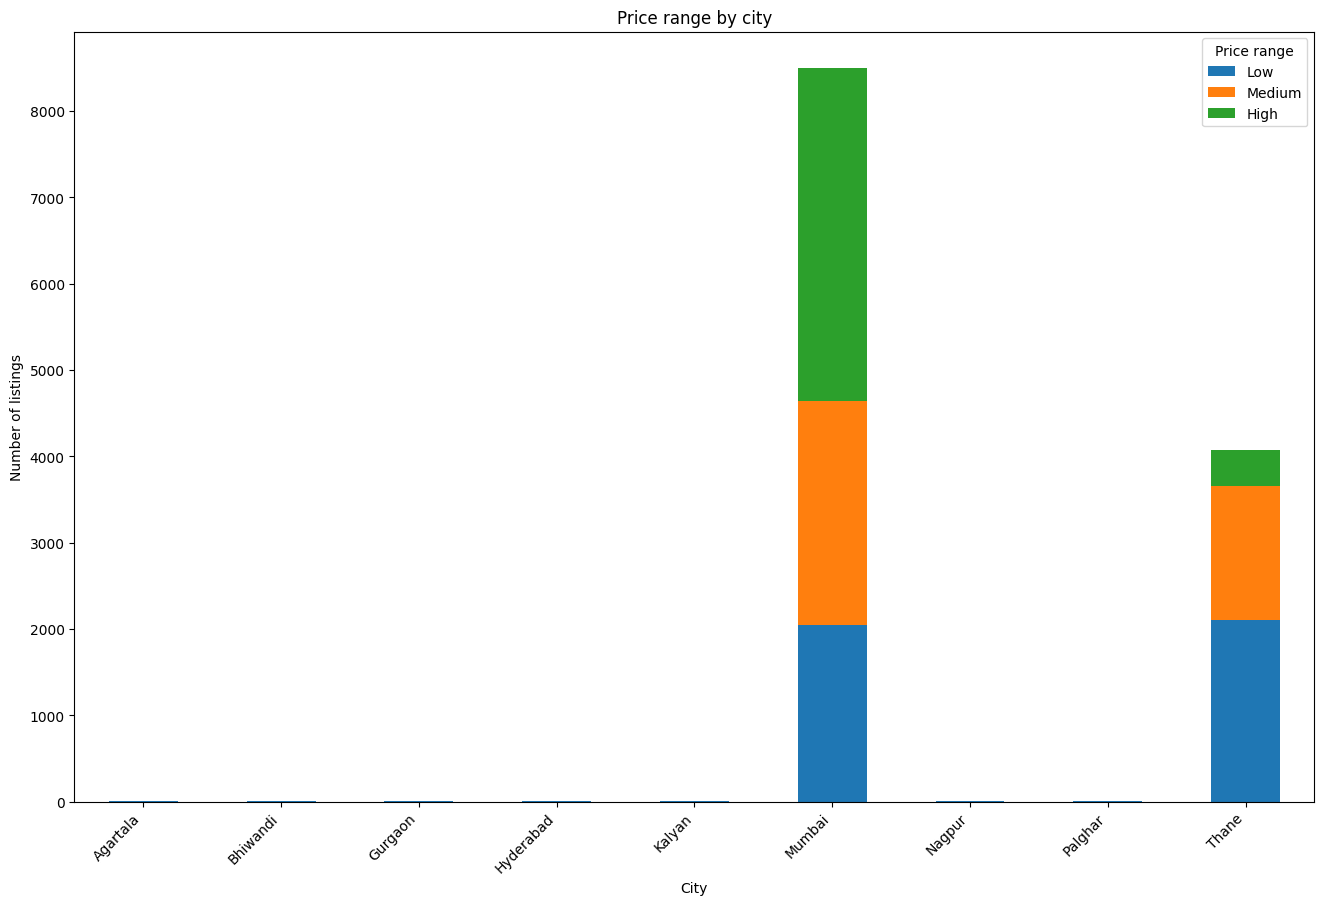

In [17]:
grouped_data.plot(kind='bar', stacked=True, figsize=(16, 10))
plt.title('Price range by city')
plt.xlabel('City')
plt.ylabel('Number of listings')
plt.legend(title='Price range')
plt.xticks(rotation=45, ha='right')
plt.show()


Box Plot

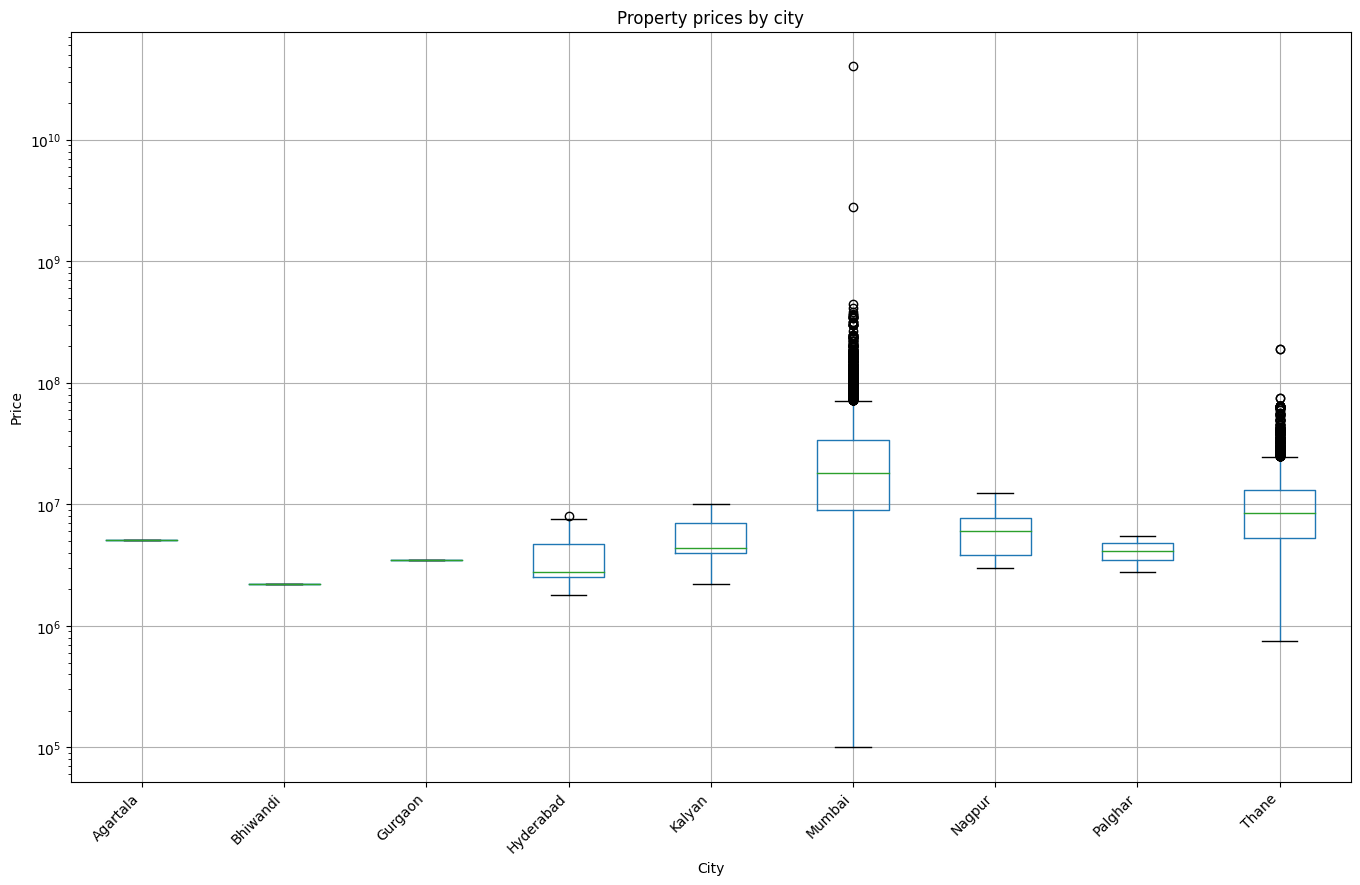

In [18]:
df.boxplot(column='Price', by='City', figsize=(16, 10))
plt.title('Property prices by city')
plt.suptitle('')
plt.xlabel('City')
plt.ylabel('Price')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_13220\3689687052.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='City', y='Price', data=df, scale='width', inner='quartile')


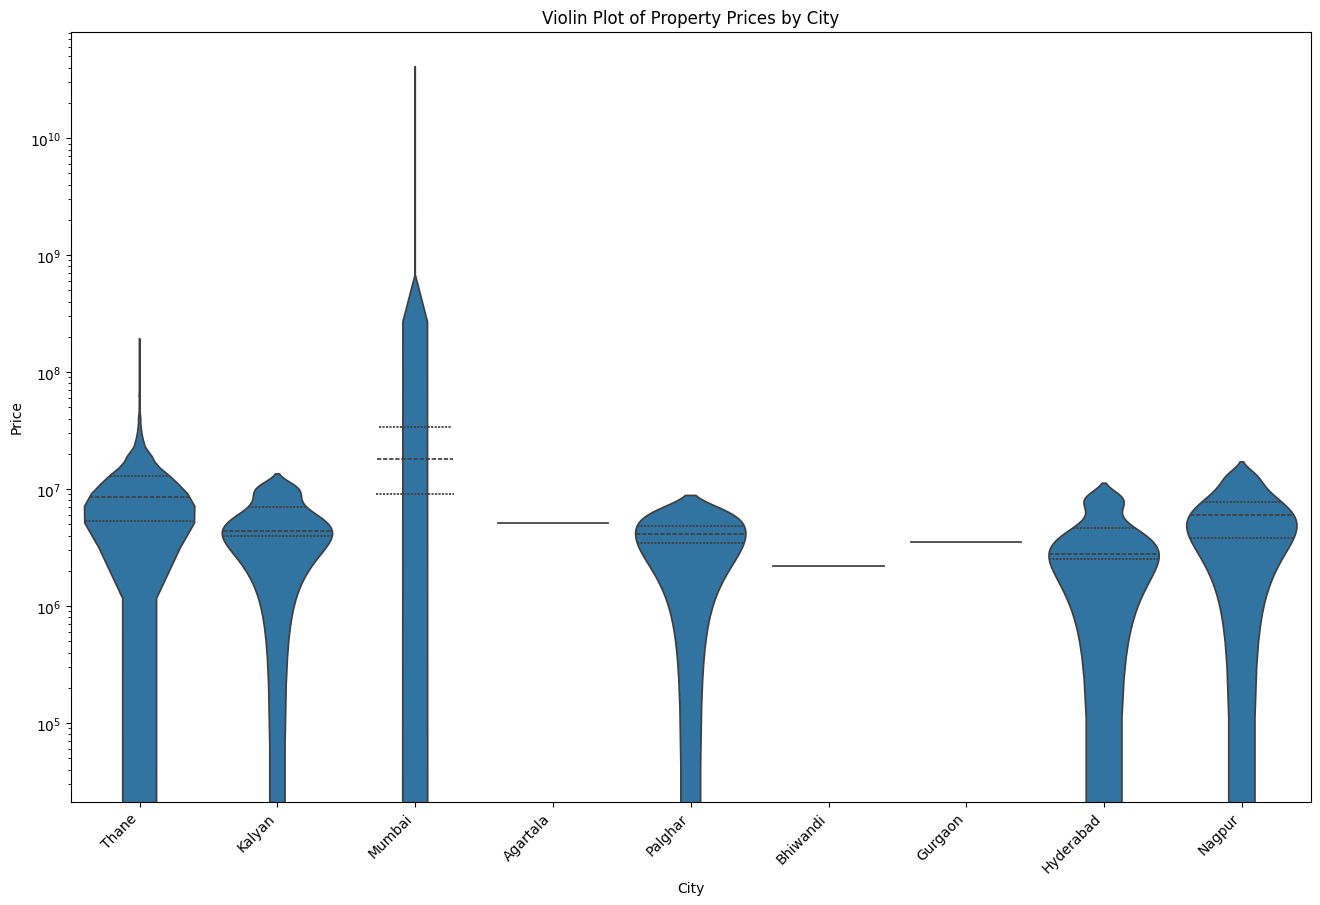

In [19]:
plt.figure(figsize=(16, 10))
sns.violinplot(x='City', y='Price', data=df, scale='width', inner='quartile')
plt.title('Violin Plot of Property Prices by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Log scale if needed
plt.show()


### Task 2

Provide investors with a high-level summary of the whole data using the price range dimensions. Consider factors like property type, city, and key amenities. What method/tool would you use to present this information effectively?

In [21]:
type(price_range)

pandas.core.series.Series

In [20]:
# Summary statistics
summary = df.groupby(['City'], price_range).agg(
    average_price=('Price', 'mean'),
    property_count=('Price', 'size')
).reset_index()

# Plot average price by city and price range
plt.figure(figsize=(12, 6))

sns.barplot(x='City', y='average_price', hue='PriceRange', data=summary)
plt.title('Average Property Price by City and Price Range')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TypeError: unhashable type: 'Series'